In [123]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [129]:
#Softmax Function
def softmax(u):
    return np.exp(u) / np.sum(np.exp(u),axis=0)

In [130]:
#Cross-Entropy Loss Function 
def multiclass_cross_entropy(p,q):
    return -np.vdot(p,np.log(q))

In [131]:
#Objective Function
def L(beta,X,y):
    N = X.shape[0]
    s = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        
        #Prediction Function
        u = beta @ xiHat
        yi_pred = softmax(u)
        
#         Calculating the loss
        s += multiclass_cross_entropy(yi,yi_pred)
    
    #Returns the average loss 
    return s / N 

In [132]:
#Calculate Gradient
def grad_L(beta,X,y):
    N = X.shape[0]
    grad = 0
    for i in range(N):
        xiHat = X[i]
        yi = y[i]
        u = beta @ xiHat 
        yi_pred = softmax(u)
        
        grad = grad + np.outer((softmax(u) - yi), xiHat)
        
    return grad / N 

In [174]:
#Logistic Regression using Gradient Descent
def MultiLogReg_GradientDescent(X,y):
    num_iters = 100
    alpha = 3
    beta = np.zeros((K,d+1))
    
    L_vals = np.zeros(num_iters)
    for t in range(num_iters):
        L_vals[t] = L(beta,X,y)
        
        if t % 20:
            print('Loss : '+ str(L_vals[t]))
            
        beta = beta - alpha * grad_L(beta,X,y)
    
    return beta, L_vals

In [175]:
#Function to predict labels
def make_predictions(beta,X):
    N = X.shape[0]
    
    predictions = []
    
    for i in range(N):
        xiHat = X[i]
        yi_pred = softmax(beta @ xiHat)
        
        k = np.argmax(yi_pred)
        predictions.append(k)
        
    return np.array(predictions)

In [188]:
#Loading in the dataset
dataset = sk.datasets.load_iris()
X = dataset.data
y = dataset.target

N = len(y)
K = len(np.unique(y))

#One-hot Encoding 
y = pd.get_dummies(y).values

In [189]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [190]:
N_train = X_train.shape[0] #Training Set : Number of rows in X_train
N_val = X_train.shape[0] #Test Set : Number of rows in X_train ??? Why X_train
d = X_train.shape[1] #Number of columns in X_train 

In [191]:
#Normalize Data
X_train = (X_train - np.mean(X_train,axis=0)) / np.std(X_train,axis=0)
X_test = (X_test - np.mean(X_train,axis=0)) / np.std(X_train,axis=0) #??? Why X_train 

In [192]:
#Insert Leading 1's to create the augmented matrix 
X_train = np.insert(X_train,0,1,axis=1)
X_test = np.insert(X_test,0,1,axis=1)

In [193]:
beta, L_vals = MultiLogReg_GradientDescent(X_train,y_train)

Loss : 0.3743215487275355
Loss : 0.2915440682140621
Loss : 0.2696585302466925
Loss : 0.2528041939488977
Loss : 0.23883836510999581
Loss : 0.22701111214845213
Loss : 0.21686873481380634
Loss : 0.20807268728334544
Loss : 0.20035956402673963
Loss : 0.19352387036306212
Loss : 0.18740639531942763
Loss : 0.1818843518459552
Loss : 0.17686285981411146
Loss : 0.1722679696667858
Loss : 0.16804126282809137
Loss : 0.16413584309351856
Loss : 0.16051343362839227
Loss : 0.15714229641821653
Loss : 0.15399574001309682
Loss : 0.14828864448333465
Loss : 0.14569158531237514
Loss : 0.14324502363850872
Loss : 0.1409359018519997
Loss : 0.1387526669997511
Loss : 0.13668504912174584
Loss : 0.134723880822531
Loss : 0.13286094857495595
Loss : 0.13108886885945356
Loss : 0.12940098404024578
Loss : 0.12779127414042746
Loss : 0.12625428157696658
Loss : 0.1247850465693898
Loss : 0.1233790514181922
Loss : 0.12203217221139662
Loss : 0.12074063679433439
Loss : 0.11950098805200347
Loss : 0.11831005172152781
Loss : 0.1171

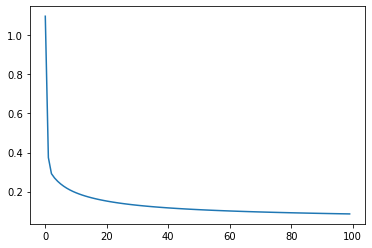

In [194]:
plt.plot(L_vals)

In [195]:
y_pred = make_predictions(beta,X_test)

In [205]:
y_pred[0:10]

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2])

In [207]:
y_test[0:10]

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)